In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("Airlines+Data.xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<AxesSubplot:>

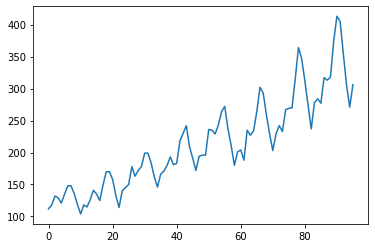

In [3]:
df['Passengers'].plot()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
df['Month'] = pd.to_datetime(df['Month'])
df['Months'] = df['Month'].dt.strftime('%b')
df.head()

,Month,Passengers,Months
0,1995-01-01,112,Jan
1,1995-02-01,118,Feb
2,1995-03-01,132,Mar
3,1995-04-01,129,Apr
4,1995-05-01,121,May


<AxesSubplot:>

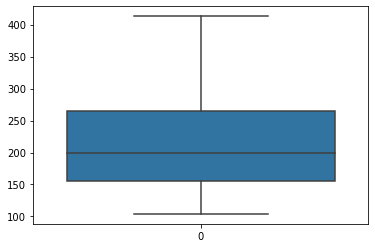

In [6]:
sns.boxplot(data=df['Passengers'])

In [7]:
month_dummies = pd.DataFrame(pd.get_dummies(df['Months']))

In [8]:
df1 = pd.concat([df,month_dummies],axis = 1)
df1.head()

,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0


In [9]:
df1["t"] = np.arange(1,97)
df1["t_squared"] = df1["t"]*df1["t"]
df1["log_Passengers"] = np.log(df1["Passengers"])
df1.columns
df1

,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,Nov,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


# Spliting The Data

In [10]:
Train=df1.head(80)
Test=df1.tail(16)

In [11]:
Train

,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2001-04-01,269,Apr,1,0,0,0,0,0,0,0,0,0,0,0,76,5776,5.594711
76,2001-05-01,270,May,0,0,0,0,0,0,0,0,1,0,0,0,77,5929,5.598422
77,2001-06-01,315,Jun,0,0,0,0,0,0,1,0,0,0,0,0,78,6084,5.752573
78,2001-07-01,364,Jul,0,0,0,0,0,1,0,0,0,0,0,0,79,6241,5.897154


# Preparing The Models

In [12]:
#linear model
import statsmodels.formula.api as smf


linear_model=smf.ols('Passengers~t',data=Train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.54262406772677

In [13]:
#Exponential

exp_model=smf.ols('np.log(Passengers)~t',data=Train).fit()
pred_exp=pd.Series(exp_model.predict(pd.DataFrame(Test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

43.79373939334308

In [14]:
#Quadratic

qua_model=smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_qua=pd.Series(qua_model.predict(pd.DataFrame(Test[['t','t_squared']])))
rmse_qua=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_qua))**2))
rmse_qua

43.65440369584248

In [15]:
#Additive seasonality
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()       # Additive seasonality
pred_add_sea = pd.Series(add_sea.predict(Test))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.26647641443301

In [16]:
# Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()    #Additive Seasonality Quadratic
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.91098357010849

In [17]:
#Multiplicative Seasonality
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()       # Multiplicative Seasonality
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.32648414621056

In [18]:
#Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()    # Multiplicative Additive Seasonality
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

9.46900023037609

In [19]:
data1 = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_qua","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
'RMSE Value':pd.Series([rmse_linear,rmse_exp,rmse_qua,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data1)
table_rmse

,MODEL,RMSE Value
0,rmse_linear,47.542624
1,rmse_exp,43.793739
2,rmse_qua,43.654404
3,rmse_add_sea,129.266476
4,rmse_add_sea_quad,23.910984
5,rmse_Mult_sea,135.326484
6,rmse_Mult_add_sea,9.469000


In [20]:
data = [['2003-01-01', 'Jan'], ['2003-02-01', 'Feb'], ['2003-03-01', 'Mar'],['2003-04-01', 'Apr'],['2003-5-01', 'May'],['2003-06-01', 'Jun'],
        ['2003-07-01', 'Jul'],['2003-08-01', 'Aug'],['2003-09-01', 'Sep'],['2003-10-01', 'Oct'],['2003-11-01', 'Nov'],['2003-12-01', 'Dec']]
forecast = pd.DataFrame(data, columns = ['Date', 'Months'])
forecast

,Date,Months
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-5-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


In [21]:
#prediction

In [22]:
dummies = pd.DataFrame(pd.get_dummies(forecast['Months']))                       # Create dummies and T and T-Squared columns
forecast1 = pd.concat([forecast,dummies],axis = 1)
forecast1["t"] = np.arange(1,13)
forecast1["t_squared"] = forecast1["t"]*forecast1["t"]
forecast1.head

<bound method NDFrame.head of           Date Months  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
0   2003-01-01    Jan    0    0    0    0    1    0    0    0    0    0    0   
1   2003-02-01    Feb    0    0    0    1    0    0    0    0    0    0    0   
2   2003-03-01    Mar    0    0    0    0    0    0    0    1    0    0    0   
3   2003-04-01    Apr    1    0    0    0    0    0    0    0    0    0    0   
4    2003-5-01    May    0    0    0    0    0    0    0    0    1    0    0   
5   2003-06-01    Jun    0    0    0    0    0    0    1    0    0    0    0   
6   2003-07-01    Jul    0    0    0    0    0    1    0    0    0    0    0   
7   2003-08-01    Aug    0    1    0    0    0    0    0    0    0    0    0   
8   2003-09-01    Sep    0    0    0    0    0    0    0    0    0    0    0   
9   2003-10-01    Oct    0    0    0    0    0    0    0    0    0    0    1   
10  2003-11-01    Nov    0    0    0    0    0    0    0    0    0    1    0   
11  2003-1

In [23]:
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data =df1).fit()     
pred_new = pd.Series(model_full.predict(forecast1))                               # Forecasting using Multiplicative Additive Seasonality Model

In [24]:
pred_new

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
5     4.931133
6     5.037387
7     5.035271
8     4.925032
9     4.794920
10    4.664470
11    4.801017
dtype: float64

In [25]:
forecast["Forecasted_log"] = pd.Series(pred_new)
forecast

,Date,Months,Forecasted_log
0,2003-01-01,Jan,4.692963
1,2003-02-01,Feb,4.703487
2,2003-03-01,Mar,4.846666
3,2003-04-01,Apr,4.813814
4,2003-5-01,May,4.807291
5,2003-06-01,Jun,4.931133
6,2003-07-01,Jul,5.037387
7,2003-08-01,Aug,5.035271
8,2003-09-01,Sep,4.925032
9,2003-10-01,Oct,4.794920


In [26]:
forecast1['Forecasted_Passengers'] = np.exp(forecast['Forecasted_log'])
forecast1

,Date,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,Forecasted_Passengers
0,2003-01-01,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,109.176148
1,2003-02-01,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,110.331245
2,2003-03-01,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,127.315234
3,2003-04-01,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,123.200587
4,2003-5-01,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,122.399578
5,2003-06-01,Jun,0,0,0,0,0,0,1,0,0,0,0,0,6,36,138.536397
6,2003-07-01,Jul,0,0,0,0,0,1,0,0,0,0,0,0,7,49,154.066959
7,2003-08-01,Aug,0,1,0,0,0,0,0,0,0,0,0,0,8,64,153.741209
8,2003-09-01,Sep,0,0,0,0,0,0,0,0,0,0,0,1,9,81,137.693733
9,2003-10-01,Oct,0,0,0,0,0,0,0,0,0,0,1,0,10,100,120.894736


In [27]:
new_var=pd.concat([df,forecast1])

<AxesSubplot:>

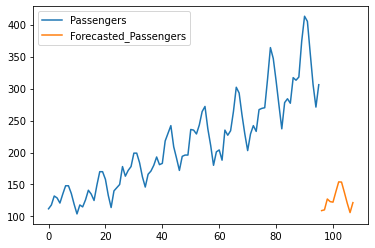

In [28]:
new_var[['Passengers','Forecasted_Passengers']].reset_index(drop=True).plot()
